In [35]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline
pd.options.display.max_colwidth=20

In [37]:
# データ保存ディレクトリへ移動
ls = os.getcwd().split('\\')
ls[-1] = 'data'
lsr=""
for i in ls:
    lsr += i+'\\'

# ディレクトリ移動
os.chdir(lsr)

In [38]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [39]:
# 提出データ用に受け皿を作成
PassengerID_df = test.PassengerId

In [40]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [41]:
# 欠損値をカウント、比率を出力する関数
def calc_missing_rate(df, v):
    total = df[v].isnull().sum()
    percent = round(total/len(df[v])*100,2)
    return pd.DataFrame([[total,percent]],columns=['total','percent'],index=[v])

# 欠損値を削除しない場合の影響を確認

In [42]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen...",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. Jo...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss....",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [43]:
# Age の欠損値を確認
calc_missing_rate(train, 'Age')

,total,percent
Age,177,19.87


.describe()は欠損値を除外して計算した結果を出力する

In [44]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


.dropna() 有無の違いを確認

<Axes: xlabel='Age', ylabel='Count'>

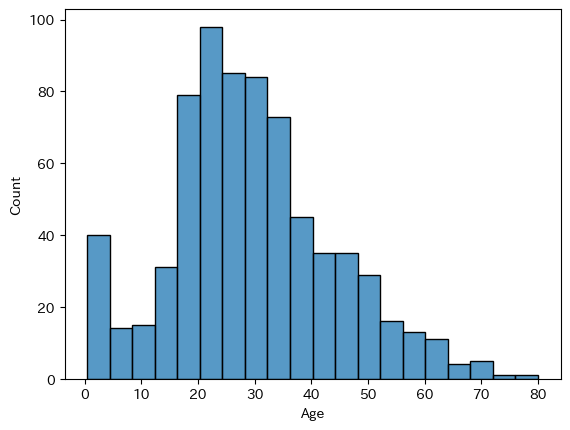

In [45]:
sns.histplot(train.Age)

<Axes: xlabel='Age', ylabel='Count'>

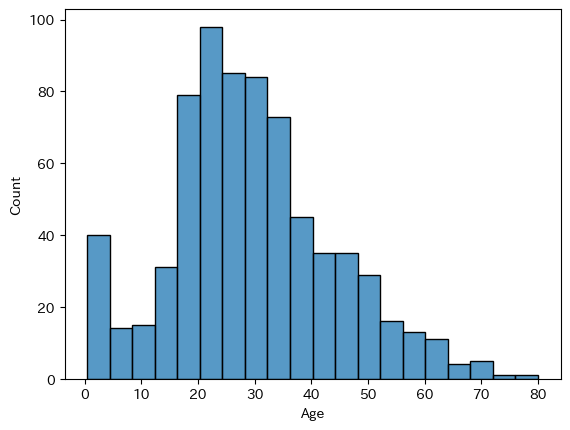

In [46]:
train.dropna(subset='Age', inplace=True)
sns.histplot(train.Age)

# 欠損値を削除

In [47]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen...",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. Jo...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss....",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [48]:
# Cabin の欠損値を確認
calc_missing_rate(train, 'Cabin')

,total,percent
Cabin,687,77.1


In [49]:
# 欠損値が多いため、Cabin を列ごと削除する
train.drop('Cabin',axis=1,inplace=True)

# 四分位範囲による外れ値の判定

Text(0.5, 1.0, 'sns.boxplotにより、25%-75%範囲を可視化')

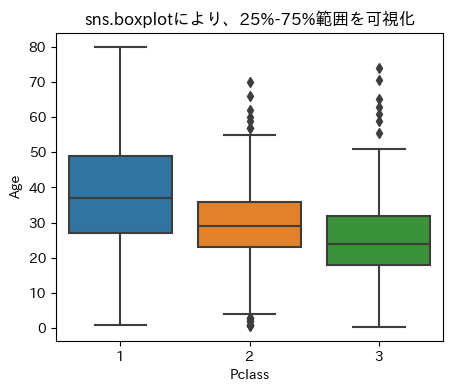

In [50]:
plt.figure(figsize=(5,4))
sns.boxplot(data=train,x='Pclass',y='Age')
plt.title('sns.boxplotにより、25%-75%範囲を可視化')

# 閾値設定によるクリッピング

In [51]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0.5, 1.0, 'データ分布を見て、運賃50以上は外れ値としてクリッピング')

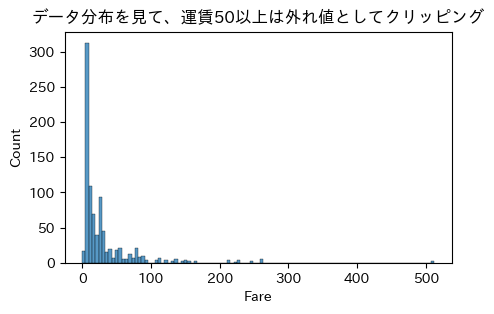

In [52]:
plt.figure(figsize=(5,3))
sns.histplot(train.Fare)
plt.title('データ分布を見て、運賃50以上は外れ値としてクリッピング')

Text(0.5, 1.0, '運賃50以上はクリッピング処理後')

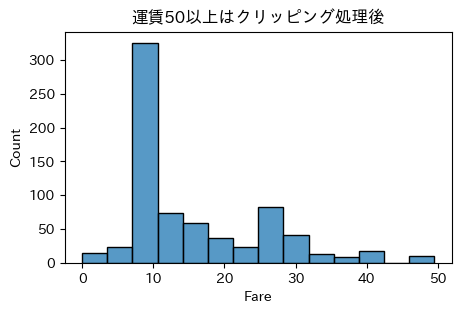

In [53]:
train = train[train.Fare<50]
plt.figure(figsize=(5,3))
sns.histplot(train.Fare)
plt.title('運賃50以上はクリッピング処理後')

In [54]:
train.Fare.describe()

count    730.000000
mean      15.500598
std       10.096170
min        0.000000
25%        7.879200
50%       11.133300
75%       23.862500
max       49.504200
Name: Fare, dtype: float64

# Cabin と 運賃の関係

In [55]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
train.head(3)
train.dropna(subset='Cabin', inplace=True)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. Jo...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. J...",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Ti...",male,54.0,0,0,17463,51.8625,E46,S


In [56]:
Cabin_ini = [ini[0:1] for ini in train.Cabin]
train['Cabin_ini'] = Cabin_ini

In [57]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ini
1,2,1,1,"Cumings, Mrs. Jo...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,4,1,1,"Futrelle, Mrs. J...",female,35.0,1,0,113803,53.1000,C123,S,C
6,7,0,1,"McCarthy, Mr. Ti...",male,54.0,0,0,17463,51.8625,E46,S,E


Text(0.5, 1.0, '客室の頭文字と運賃の関係性の確認')

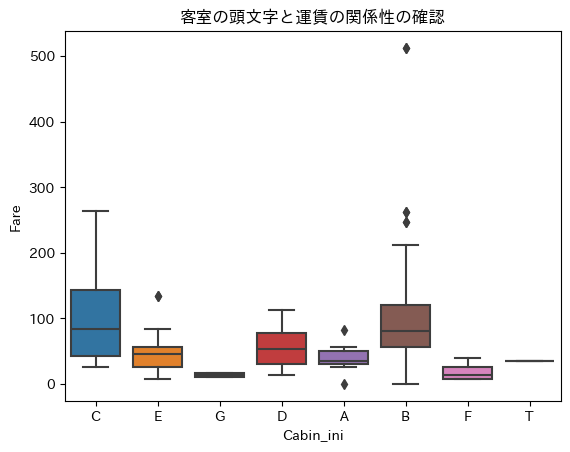

In [58]:
sns.boxplot(data=train, x='Cabin_ini', y='Fare')
plt.title('客室の頭文字と運賃の関係性の確認')

In [59]:
train.groupby('Cabin_ini')['Fare'].describe().T

Cabin_ini,A,B,C,D,E,F,G,T
count,15.000000,47.000000,59.000000,33.000000,32.000000,13.000000,4.000000,1.0
mean,39.623887,113.505764,100.151341,57.244576,46.026694,18.696792,13.581250,35.5
std,17.975333,109.301500,70.225588,29.592832,32.608315,11.728217,3.601222,NaN
min,0.000000,0.000000,26.550000,12.875000,8.050000,7.650000,10.462500,35.5
25%,30.847900,57.000000,42.502100,30.000000,26.112500,7.750000,10.462500,35.5
50%,35.500000,80.000000,83.475000,53.100000,45.181250,13.000000,13.581250,35.5
75%,50.247900,120.000000,143.591650,77.287500,56.157300,26.000000,16.700000,35.5
max,81.858300,512.329200,263.000000,113.275000,134.500000,39.000000,16.700000,35.5


# 要約統計量

In [60]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
# カテゴリデータを出力
train.describe(exclude='number')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen...",male,347082,B96 B98,S
freq,1,577,7,4,644


In [62]:
# count, mean のみ
train.describe().loc[['count','mean']]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.0,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208


# 年齢の分布をヒストグラムで確認

<Axes: xlabel='Age', ylabel='Count'>

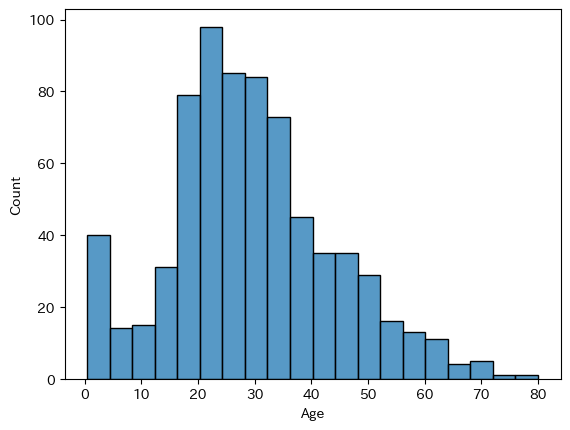

In [63]:
train.dropna(subset=['Age'], inplace=True)
sns.histplot(train.Age)

<Axes: xlabel='Age', ylabel='Count'>

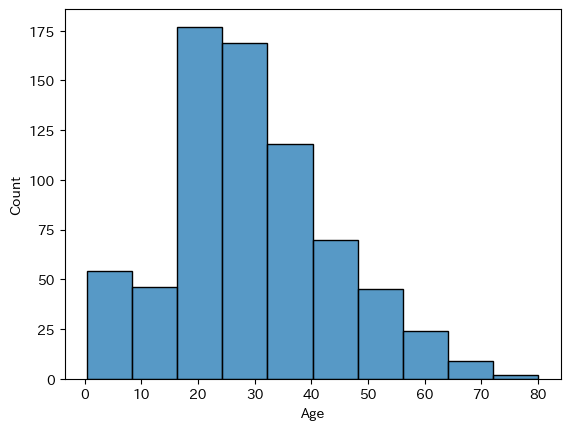

In [64]:
# ビンの幅を変える
sns.histplot(train.Age,bins=10)

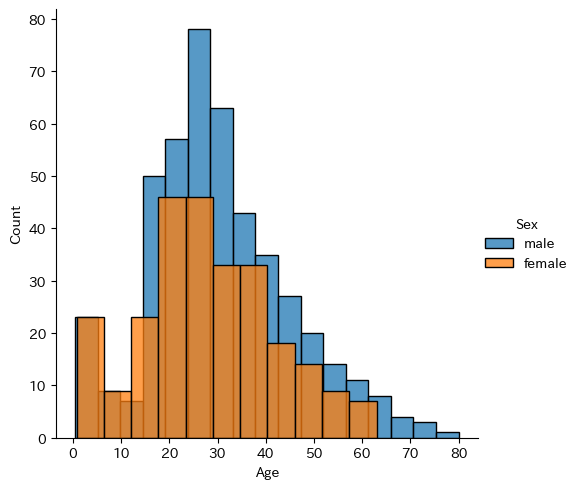

In [65]:
# 性別でスライシング
g = sns.FacetGrid(train,hue='Sex',height=5)
g.map(sns.histplot,'Age')
g.add_legend()

# 客室ごと年齢を確認

<Axes: xlabel='Pclass', ylabel='Age'>

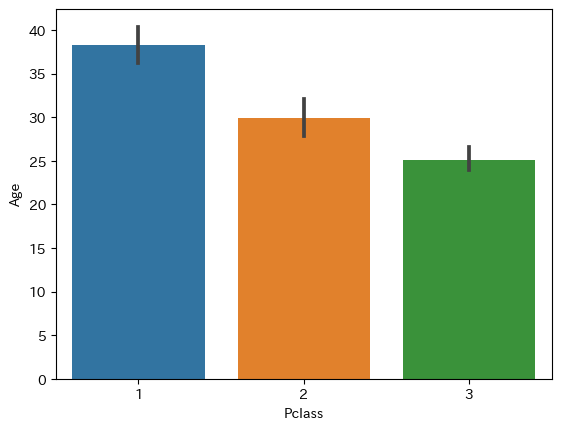

In [71]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
sns.barplot(data=train,x='Pclass',y='Age')

In [ ]:
# 生死との関連
sns.barplot(data=train,x='Pclass',y='Age',hue='Survived')

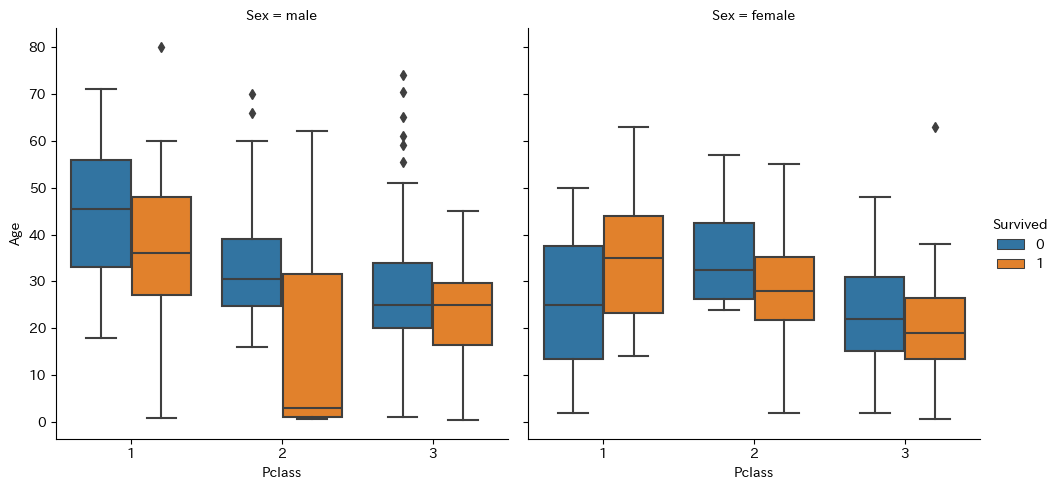

In [79]:
# 男女別に分ける
sns.catplot(data=train,kind='box',x='Pclass',y='Age',hue='Survived',col='Sex')

# 箱ひげ図

<Axes: xlabel='Pclass', ylabel='Age'>

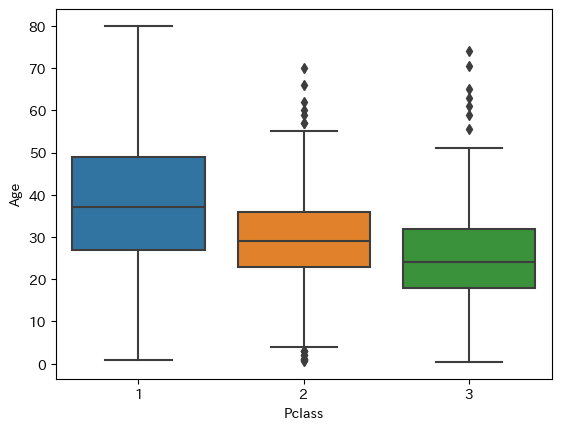

In [76]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
sns.boxplot(data=train,x='Pclass',y='Age')

<Axes: xlabel='Pclass', ylabel='Age'>

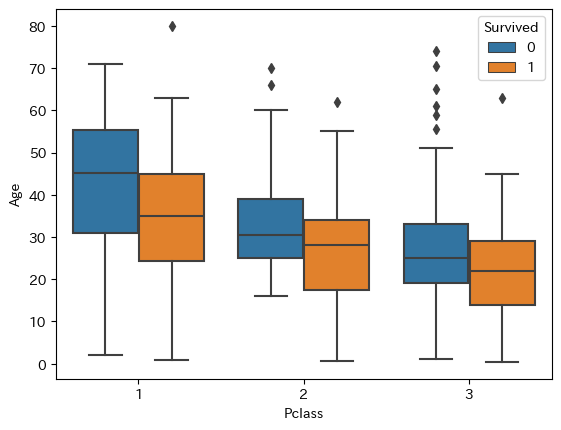

In [77]:
# 生死でスライシング
sns.boxplot(data=train,x='Pclass',y='Age',hue='Survived')

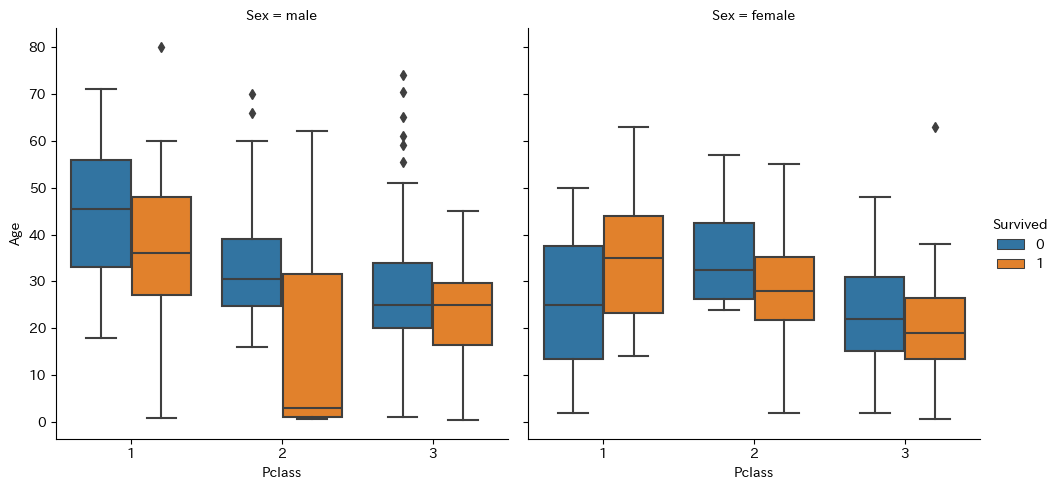

In [80]:
# 生死でスライシング
sns.catplot(data=train,kind='box',x='Pclass',y='Age',hue='Survived',col='Sex')

<Axes: xlabel='Pclass', ylabel='Age'>

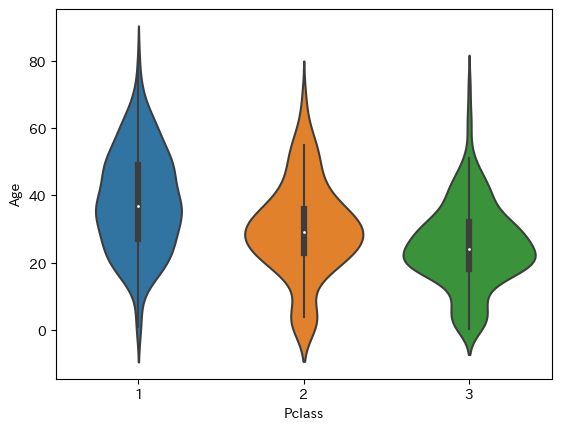

In [81]:
sns.violinplot(data=train,x='Pclass',y='Age')

<Axes: xlabel='Pclass', ylabel='Age'>

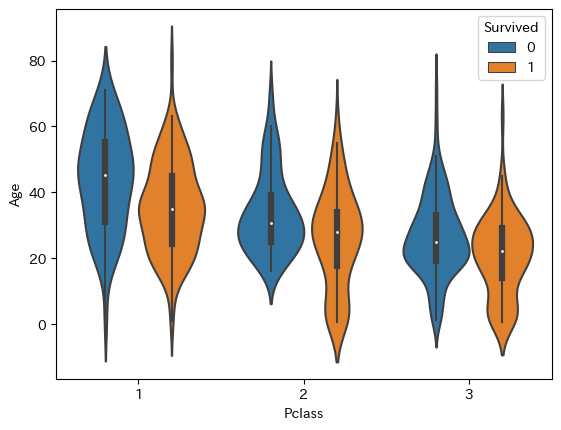

In [82]:
sns.violinplot(data=train,x='Pclass',y='Age',hue='Survived')

<Axes: xlabel='Pclass', ylabel='Age'>

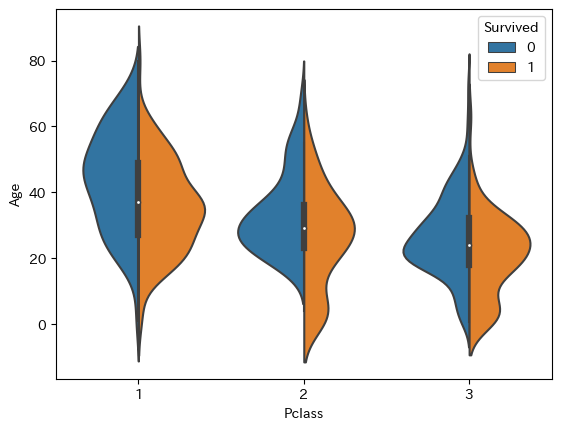

In [83]:
sns.violinplot(data=train,x='Pclass',y='Age',hue='Survived',split=True)

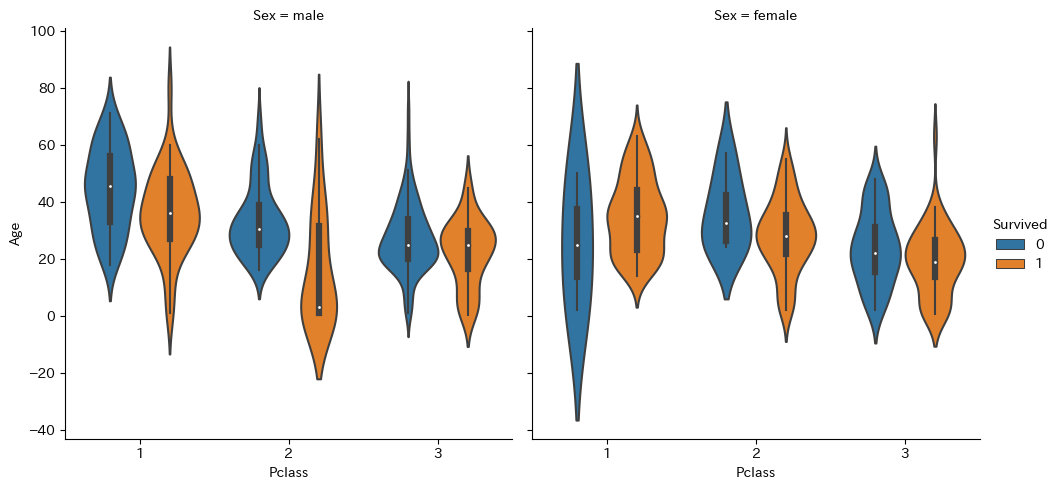

In [84]:
sns.catplot(data=train,kind='violin',x='Pclass',y='Age',hue='Survived',col='Sex')

In [92]:
# ヒートマップで確認
train.drop([['Name','Sex']],axis=1,inplace=True)
train['Adult_female'] = train.Sex.apply(lambda x:True if x == 'female' else False)
plt.figure=((9,6))
sns.heatmap(train.corr(),annot=True)

KeyError: "[('Name', 'Sex')] not found in axis"